<a href="https://www.kaggle.com/code/pavithraloganathan/cyclistic-notebook?scriptVersionId=118021165" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Cyclistic Bike Share Analysis - A Case Study using Python

## Introduction
Hi! Im Pavithra and this notebook represents my work for Google Data Analytics capstone project.
Given the scenario that I'm  the  data analyst working in the marketing analyst team at Cyclistic, a fictional bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,  team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve my recommendations, so they must be backed up with compelling data insights and professional data visualizations. 


### The following steps are involved in the analysis
1. Ask    
2. Prepare     
3. Process      
4. Analyse     
5. Share      
6. Act      



## Ask
    
   
   Ask phase involves asking the right questions

1. How do annual members and casual riders use Cyclistic bikes differently?       
2. Why would casual riders buy Cyclistic annual memberships?       
3. How can Cyclistic use digital media to influence casual riders to become members? 

### Key tasks
1. Identify the business task        
    The business task here is to design marketing strategies for converting casual riders to annual members,as it leads to more profit.
2. Consider key stakeholders       
    The key stake holders in this task are Cyclistic executive team, Lily Moreno, The Director of Marketing & Marketing Analytics team



## Prepare 

We will use Cyclistic’s historical trip data to analyze and identify trends.I have Downloaded the previous 12 months of Cyclistic trip data here(jan 2022-dec 2022). The data has been made available by Motivate International Inc. under this license.) 
This is public data but the data-privacy issues prohibits us from using riders’ personally identifiable information. This means that we won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.Hence Privacy is maintained. https://ride.divvybikes.com/data-license-agreement

### Key tasks
1. Download data and store it appropriately     
    The data is located online in the link as follows: https://divvy-tripdata.s3.amazonaws.com/index.html       
    The data from Jan 2022 - Dec 2022 has been downloaded from the source and stored in a separate folder for analysis
2. Identify how it’s organized      
    The data is organised in the form of CSV files for each month including 13 columns as follows :
     Column names "ride_id", "rideable_type", "started_at", "ended_at", "start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng", "member_casual"    
3. Sort and filter the data       
    The data has been sorted by 'started_at' column and filtered as required for analysis
4. Determine the credibility of the data.             
    All the files in the data set contains similar column names and clearly cited hence data integrity is verified 
    The data contains the relevant information about the casual and member riders for us to answer the question from Ask phase.
    There is no bias or credibility issue with the data.The data is large enough hence its RELIABLE, the source of data is verified hence its ORIGINAL, the data contains all the information required for the task in a organised way hence its COMPREHENSIVE , The file names column names  are named properly hence its CITED, the data is from the past 12 months hence its CURRENT Thus the data follows ROCCC and data credibility is validated.The data has no problems and can be used for our analysis. 



## Process
Process phase involves processing the data for compatibility with the tools used  and data format checks for easy utilisation.

### Key tasks 
1. Check the data for errors                 
    The data is checked for duplicates, nulls & outliers if any.
2. Choose your tools           
    The tools used here are Jupyter notebooks and python libraries.
3. Transform the data so you can work with it effectively      
    The data is transformed by importing all the 12 month files and combining them in to a single dataframe which is cleaned by removing duplicated nulls and outliers , dropping unused columns to save time, creating calculated fields from columns required for analysis 
4. Document the cleaning process        
    The cleaning process is doccumented and a copy of the cleaned data is saved for future use. 

In [1]:
#import the libraries required

import pandas as pd
import numpy as np
import glob as glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# open csv files for every month and load them as one dataframe using concat function

path = '/kaggle/input/gdacp-cs-1'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
big_df   = pd.concat(df_list, ignore_index=True)

In [3]:
# view the structure of dataframe

big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [4]:
#check for null values and drop the rows containing null values

big_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

In [5]:
big_df = big_df.dropna(axis=0, how = 'any')

In [6]:
# after remove nulls the dataframe should now contain 0 null

big_df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [7]:
#check for duplicates

big_df.duplicated().any()

False

In [8]:
#convert the date columns to datetime format
#convert 'rideable_type' & 'member_casual' columns to category format

big_df['started_at'] = pd.to_datetime(big_df['started_at'])
big_df['ended_at'] = pd.to_datetime(big_df['ended_at'])
big_df['rideable_type'] = big_df.rideable_type.astype('category')
big_df['member_casual'] = big_df.member_casual.astype('category')

In [9]:
# drop unused columns

big_df = big_df.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [10]:
#Extract the month name and day name from 'started_at' and 'ended_at' columns using datetime library

big_df['month_of_ride'] = pd.to_datetime(big_df['started_at']).dt.month
big_df['month_of_ride'] = pd.to_datetime(big_df['month_of_ride'],format='%m').dt.month_name()
big_df['day_of_ride'] = pd.to_datetime(big_df['started_at']).dt.day
big_df['day_of_ride'] = pd.to_datetime(big_df['day_of_ride'],format='%d').dt.day_name()

In [11]:
#extract the months and days as numbers for plotting

big_df['month_num'] = big_df['started_at'].dt.month
big_df['day_num'] = big_df['started_at'].dt.weekday

In [12]:
# check the structure of dataframe to ensure columns are in the required format

big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4369360 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       category      
 9   month_of_ride       object        
 10  day_of_ride         object        
 11  month_num           int64         
 12  day_num             int64         
dtypes: category(2), datetime64[ns](2), int64(2), object(7)
memory usage: 408.4+ MB


In [13]:
# create a new column 'trip_duration'  as difference between the ride end time and ride start time(in minutes) and cast it to integer datatype for analysis

big_df['trip_duration'] = (big_df['ended_at']-big_df['started_at'])/dt.timedelta(minutes=1)

In [14]:
big_df['trip_duration']= big_df['trip_duration'].astype('int32')

In [15]:
# inspect the created column 

big_df['trip_duration'].describe()

count    4.369360e+06
mean     1.660546e+01
std      4.786771e+01
min     -1.680000e+02
25%      6.000000e+00
50%      1.000000e+01
75%      1.900000e+01
max      3.435400e+04
Name: trip_duration, dtype: float64

In [16]:
# Negative values are observed in 'trip_duration'column.Hence these outliers need to be removed

outliers = big_df['trip_duration'] <= 0
big_df[outliers].count()

ride_id               76651
rideable_type         76651
started_at            76651
ended_at              76651
start_station_name    76651
start_station_id      76651
end_station_name      76651
end_station_id        76651
member_casual         76651
month_of_ride         76651
day_of_ride           76651
month_num             76651
day_num               76651
trip_duration         76651
dtype: int64

In [17]:
# Removing outliers 

big_df.drop(big_df[outliers].index,inplace = True)

In [18]:
#ensure the outliers are removed

big_df['trip_duration'].describe()

count    4.292709e+06
mean     1.690237e+01
std      4.824086e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.900000e+01
max      3.435400e+04
Name: trip_duration, dtype: float64

In [19]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4292709 entries, 0 to 5667716
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       category      
 9   month_of_ride       object        
 10  day_of_ride         object        
 11  month_num           int64         
 12  day_num             int64         
 13  trip_duration       int32         
dtypes: category(2), datetime64[ns](2), int32(1), int64(2), object(7)
memory usage: 417.6+ MB


## Analyse

### Key tasks 
1. Aggregate your data so it’s useful and accessible 
2. Organize and format your data
3. Perform calculations
4. Identify trends and relationships 

In [20]:
# get a count of number of riders in both categories using pivot table

pd.pivot_table(big_df,
              index = 'member_casual',
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

,count
,ride_id
member_casual,
casual,1731225
member,2561484
Total Count,4292709


The above pivot table shows that majority of riders are under annual plan 

In [21]:
big_df['rideable_type'].value_counts()

classic_bike     2558903
electric_bike    1560462
docked_bike       173344
Name: rideable_type, dtype: int64

The above pivot table shows that majority of riders are under annual plan 

In [22]:
big_df['trip_duration'].describe()

count    4.292709e+06
mean     1.690237e+01
std      4.824086e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.900000e+01
max      3.435400e+04
Name: trip_duration, dtype: float64

In [23]:
big_df['day_of_ride'].mode()

0    Tuesday
dtype: object

In [24]:
big_df['month_of_ride'].mode()

0    July
dtype: object

In [25]:
# Get the Average trip duration of member Vs casual over days of week

pd.pivot_table(big_df,
              index = ['member_casual','day_num'],
              values = 'trip_duration',
              aggfunc = ['mean'],
              margins = True,
              margins_name = 'mean trip_duration')

mean
                           trip_duration
member_casual      day_num              
casual             0           24.720888
                   1           21.274041
                   2           20.537022
                   3           21.230277
                   4           22.206749
                   5           26.692596
                   6           27.161201
member             0           11.760009
                   1           11.508758
                   2           11.571606
                   3           11.759237
                   4           11.969158
                   5           13.775715
                   6           13.640666
mean trip_duration             16.902368

It is observed from the table that the average trip duration is comparitively higher on weekend for both casual and annual members and lower on weekdays

## Share
We have performed your analysis and gained some insights into the data,now lets create visualizations to share our findings. We want to make sure our visualisations are sophisticated and polished in order to effectively communicate to the executive team. 

### Key tasks 
1. Determine the best way to share your findings.
2. Create effective data visualizations. 
3. Present your findings. 
4. Ensure your work is accessible. 

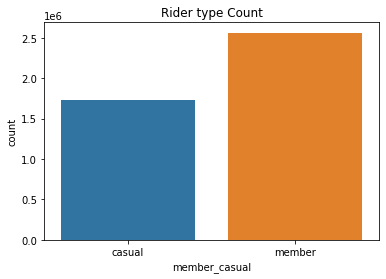

In [26]:
sns.countplot(x='member_casual', data=big_df).set(title='Rider type Count')
plt.show()

The members in annual plan are more in number compared to casual plan

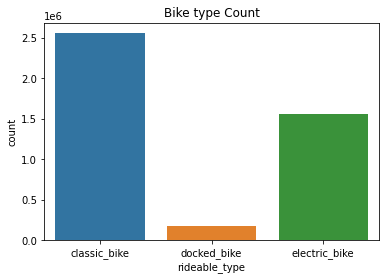

In [27]:
sns.countplot(x='rideable_type', data=big_df).set(title='Bike type Count')
plt.show()

The users preference is more towards classic bike and less towars docked bike

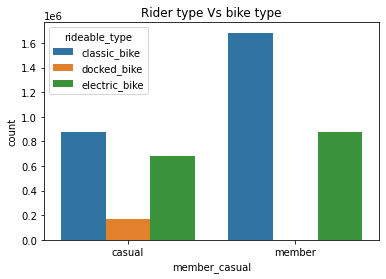

In [28]:
sns.countplot(x = 'member_casual', data = big_df, hue='rideable_type').set(title='Rider type Vs bike type')
plt.show()

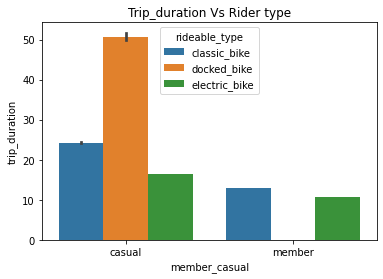

In [29]:
sns.barplot(x='member_casual', y='trip_duration',hue='rideable_type',data=big_df).set(title='Trip_duration Vs Rider type')
plt.show()

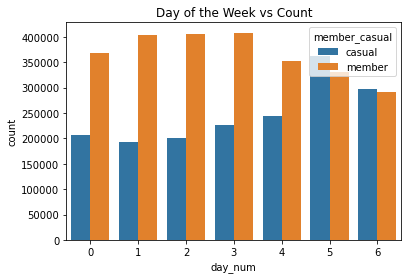

In [30]:
sns.countplot(x='day_num',data = big_df, hue='member_casual').set(title='Day of the Week vs Count')
plt.show()

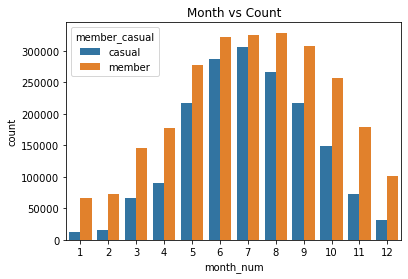

In [31]:
sns.countplot(x='month_num',data = big_df, hue='member_casual').set(title='Month vs Count')
plt.show()

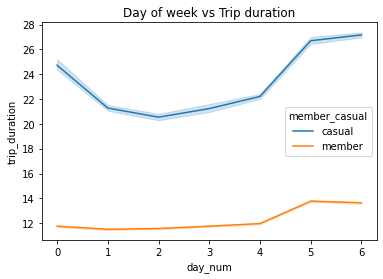

In [32]:
sns.lineplot(x='day_num', y='trip_duration',hue = 'member_casual', data=big_df).set(title='Day of week vs Trip duration')
plt.show()


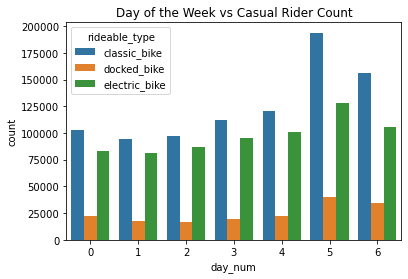

In [33]:
sns.countplot(x='day_num',data =big_df[big_df['member_casual'] == 'casual'], hue='rideable_type').set(title='Day of the Week vs Casual Rider Count')
plt.show()


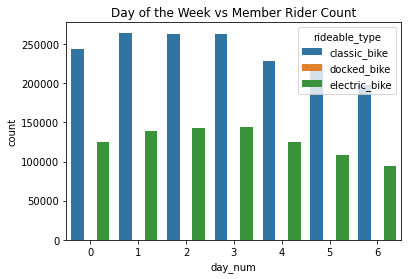

In [34]:
sns.countplot(x='day_num',data =big_df[big_df['member_casual'] == 'member'], hue='rideable_type').set(title='Day of the Week vs Member Rider Count')
plt.show()


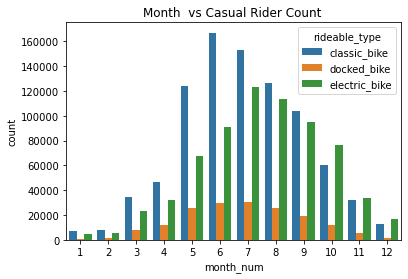

In [35]:
sns.countplot(x='month_num',data =big_df[big_df['member_casual'] == 'casual'], hue='rideable_type').set(title='Month  vs Casual Rider Count ')
plt.show()


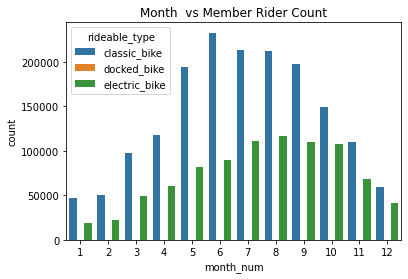

In [36]:
sns.countplot(x='month_num',data =big_df[big_df['member_casual'] == 'member'],hue='rideable_type').set(title='Month  vs Member Rider Count')
plt.show()


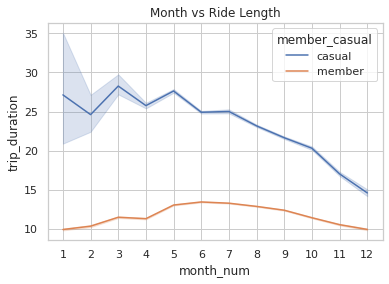

In [37]:
sns.set(style="whitegrid")
sns.lineplot(x='month_num', y='trip_duration',hue = 'member_casual', data=big_df).set(title='Month vs Ride Length')
plt.xticks(np.arange(min(big_df['month_num']), max(big_df['month_num'])+1, 1.0))
plt.show()


## Act
 
### Findings from the visualisations

1. Riders in the annual member category comprise about 60 percent and casual plan comprise 40 percent of the total customers

2. Classic bikes are most preferred of the three categories with almost 60 percent of the riders using classic bikes in both the groups, followed by electric bike (36%) Docked bike is the least preferred with only 4 percent riders(only casual) using it.

3. Over the week behavior of casual riders shows the frequency of rides were more on weekend(saturday,sunday) and was the least on tuesday.In case of annual members frequency was more on weekdays and less on weekend.

4. Behavior of casual riders over the year shows that the maximum number of trips were observed during mid year on the months of july,june and august(descending order).The months with least no of trips were January and february.In case of annual members similar trend was observed midyear was busy with trips and beginning of the year was dull with less trips.

5. Duration of trip among casual and annual riders shows that Casual riders have longer trip duration compared to annual members  in all the bike categories with docked bikes riders having maximum trip duration.Also in both groups long trips were made during weekends compared to weekdays.Over the year data shows casual riders had their longest trip on March and shortest trip  on december & member riders had longest trip on june and shortest trip  on december in terms of trip duration





### Suggestions  

1. Casual riders are less profitable and only 40 % according to data so they need to be convinced to chnage to annual plan.The data shows that the casual riders are more active on weekends 

2. Casual riders behavior shows that they prefer Classic bikes and hence discounts  for classic bikes on annual membership would increase the chances of them switching from casual to member plans

3. Casual riders using docked bikes had trips with long durations,hence customizing the  promotional offers/discounts in annual memberships for casual riders by keeping track of their duration and offering them points based on it would be a good solution.These points can be converted to discounts for annual membership  plans

4. Casual rider behavior throughout the week shows that they use the bikes more on weekend which is quiet opposite in trend to member riders who frequented more on weekdays.Therefore weekend based membership plan with a pricing less than annula plan but greater than casual plan would make the casual riders convert to the new plan.

5. Casual rider behavior through the month shows the activity was more during the month of july,august & june,therefore advertisement campaigns during this time of the year would be beneficial in bringing in casual members to annual plans.


Hence by understanding the casual rider behavior and customizing the plans according to the season of the year,time of the week, type of the bikes preferred & length of rides made  would convince them and bring in more customers in to the customised member plan which would be a win-win for both the organisation and customers.

